__AUTHORS__ = Elia Mercatanti, Matteo Gemignani

__EMAIL__ = elia.mercatanti@stud.unifi.it, matteo.gemignani@stud.unifi.it

# Progetto di Analysis of Algorithms and Data Structures - 2018/2019
## Coefficienti Centrali delle Matrici di Riordan

Lo scopo di questo Notebook è quello di riprodurre alcuni risultati presentati in "On the Central Coefficients of Riordan Matrices" (Paul Barry, 2013), disponibile a questo [link](https://cs.uwaterloo.ca/journals/JIS/VOL16/Barry1/barry242.html).
In particolare, utilizzeremo il teorema di inversione di Lagrange per caratterizzare la funzione generatrice dei coefficienti centrali degli elementi di matrici di Riordan. Applicheremo il risultato ottenuto per calcolare la funzione generatrice dei coefficienti centrali di alcuni arrays di Riordan definiti da espressioni razionali e irrazionali.

### Definizioni su Sequenze di Interi, Inversione di Lagrange e Arrays di Riordan

#### Funzione Generatrice e Operatore "Coefficente di"

Per una sequenza di interi $a_n$, che è un elemento di $\mathbb{Z}^\mathbb{N}$, la serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ è chiamata *funzione generatrice* o f.g. della sequenza. $a_n$ è dunque il coefficiente di $t^n$ in questa serie. Rappresentiamo questo con $a_n=[t^n]f(t)$. Per esempio, $F_n=[t^n]\frac{t}{1-t-t^2}$ è l'$n$-esimo numero di Fibonacci, mentre $C_n=[t^n]\frac{1-\sqrt{1-4t}}{2t}$ è l'$n$-esimo numero di Catalan. 

#### Inversa Composizionale
Per una serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ con $f(0)=0$ e $f'(0)\neq0$ definiamo la *reversione* o l'*inversa composizionale* di $f$ come la serie di potenze $\bar{f}(t)$ (anche scritta $f^{[-1]}(t)$) tale che: 
\begin{equation}
f(\bar{f}(t))=t
\end{equation}

#### Teorema di inversione di Lagrange

Supponiamo che una serie formale di potenze $w=w(t)$ è implicitamente definita dalla relazione $w=t\phi(w)$, dove $\phi(w)$ è una serie formale di potenze tale che $\phi(0)=0$. Quindi, per qualsiasi serie formale di potenze $F(t)$,

\begin{equation}
f(\bar{f}(t))=t
\end{equation}


[link](#section)
<a name="section"> dfsdsdg </a>

Importiamo la libreria Sympy che verrà utilizzata per il calcolo simbolico più alcune alcune altre librerie per stampare in modo accurato le espressioni matematiche che utilizzeremo.

In [1]:
from sympy import init_printing

Utiliziamo la seguente funzione per stampare graficamente le espressioni matematiche che utilizzeremo

In [2]:
init_printing()

In [3]:
from sympy import init_printing # to render math stuff with MathJax (https://www.mathjax.org/)
from sympy import Symbol, Function, Matrix, IndexedBase # fundamentals objects to play with
from sympy.abc import * # a collection of already-defined terms, such as `alpha, a, b, x, y, t, ...`
from sympy import solve, sqrt
from sympy.plotting import plot
from sympy import *

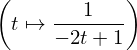

In [4]:
d = Lambda([t], 1/(1-2*t))
d

In [5]:
f = Lambda([t], (1-2*t)/(1-3*t))

In [6]:
vt = v*(1-3*v)/(1-2*v)
eq = Eq(vt, t)

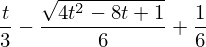

In [7]:
sol = solve(eq, v)
vt = sol[0]
vt

In [8]:
v = Lambda([t], vt)

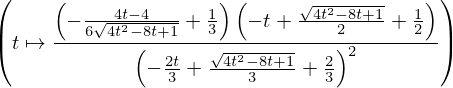

In [9]:
d2nn = Lambda([t], d(v(t))/f(v(t)) * diff(v(t), t))
d2nn

In [10]:
fg = series(d2nn(t), t, n=5)

In [11]:
fg.coeff(t, n=3)

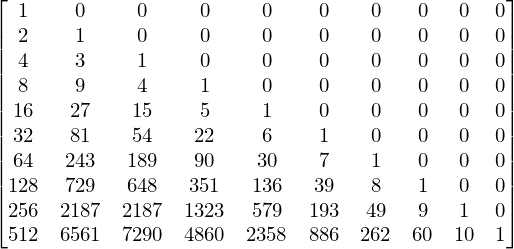

In [12]:
matrix = eye(10)
for i in range(10):
    col = Lambda([t], d(t)*(t*f(t))**i)
    a = series(col(t), t, n=10)
    for j in range(10):
        matrix[j,i] = a.coeff(t, n=j)

matrix